Predicting User Behavior & Battery Drain

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/home/user_behavior_dataset.csv")

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [ ]:
df.head(15)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


Univariate Analysis

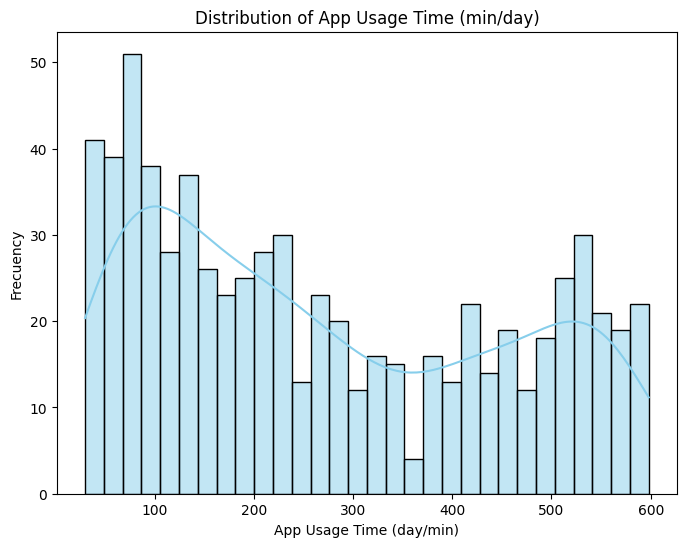

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['App Usage Time (min/day)'], bins=30,
             kde=True, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (day/min)')
plt.ylabel('Frecuency')
plt.show()

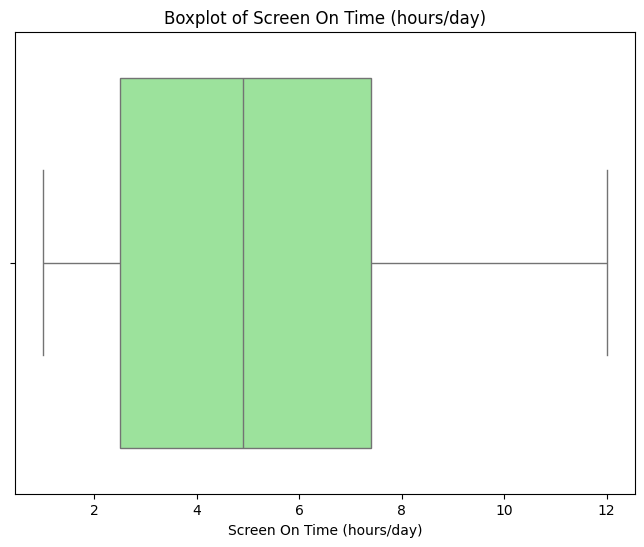

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='lightgreen')
plt.title('Boxplot of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.show()

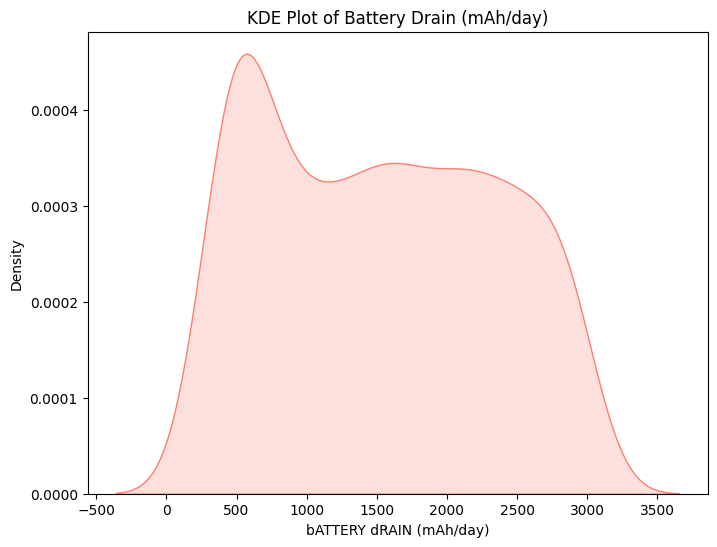

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True,
            color='salmon')
plt.title('KDE Plot of Battery Drain (mAh/day)')
plt.xlabel('bATTERY dRAIN (mAh/day)')
plt.ylabel('Density')
plt.show()

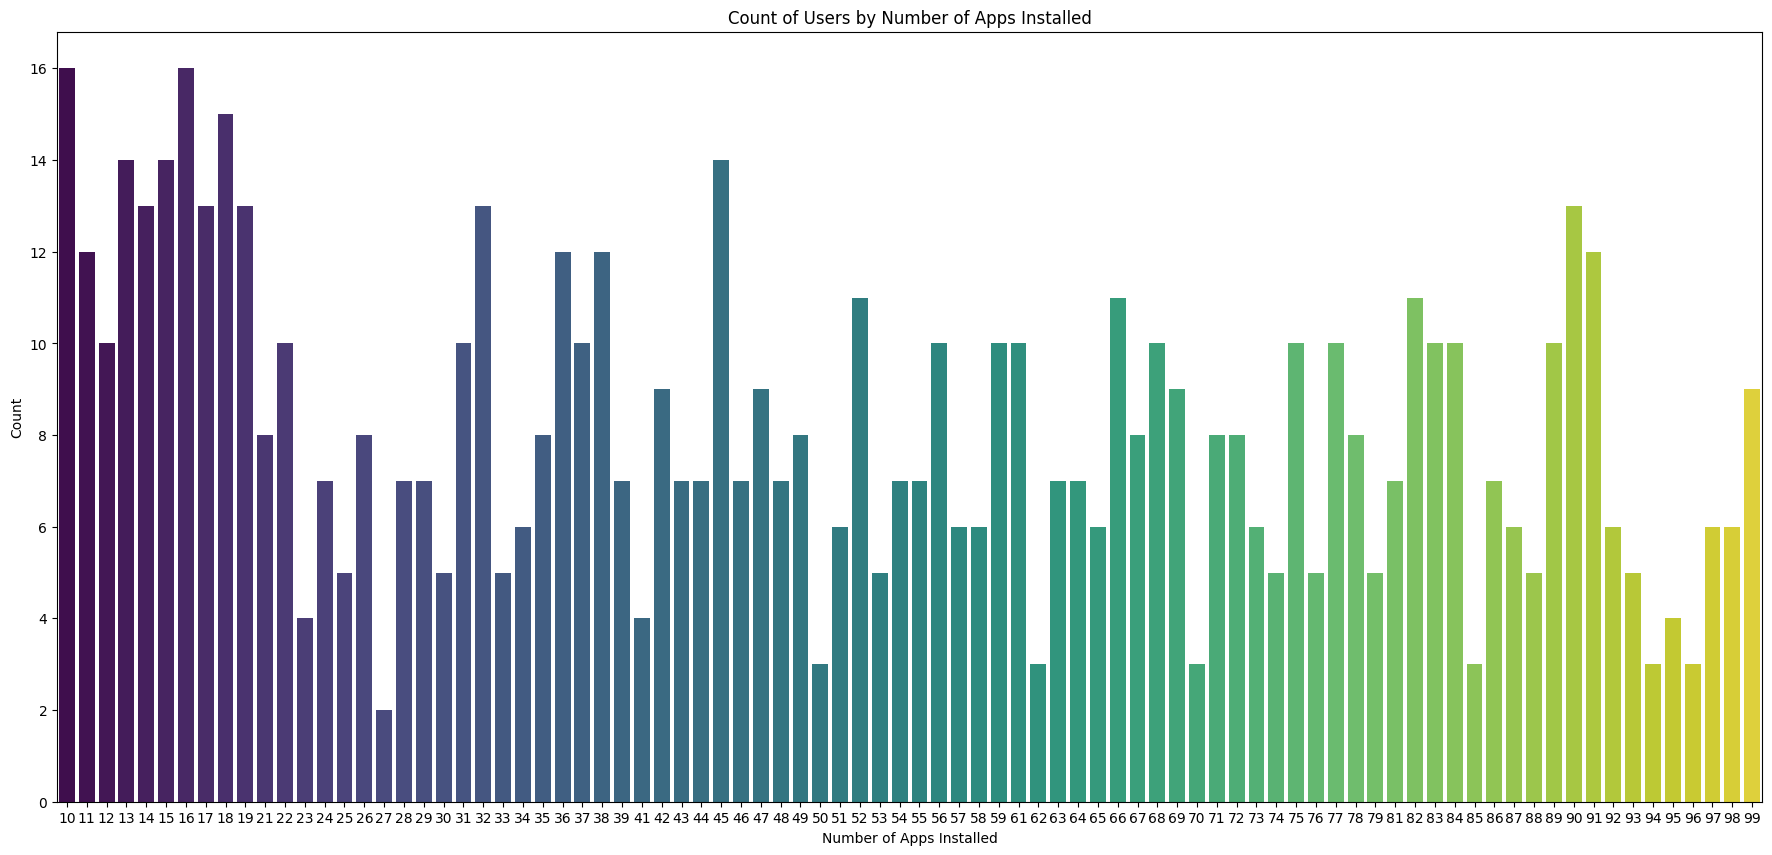

In [ ]:
plt.figure(figsize=(22, 10))
sns.countplot(x='Number of Apps Installed', data=df,
              palette='viridis')
plt.title('Count of Users by Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Count')
plt.show()

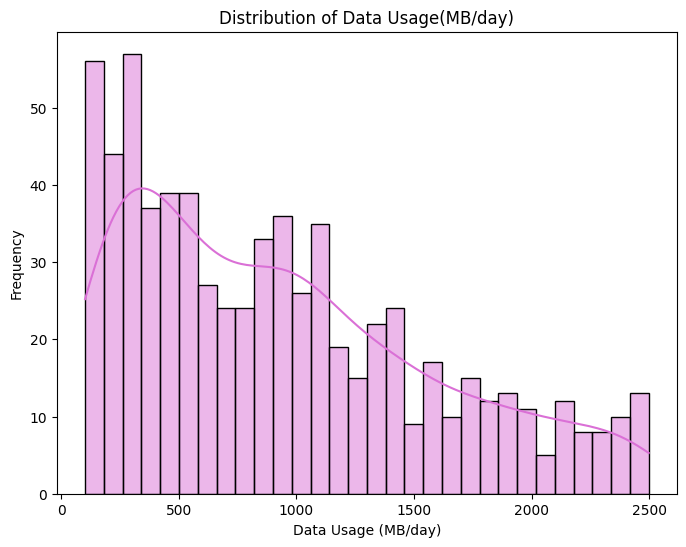

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Data Usage (MB/day)'], bins=30, color='orchid', kde=True)
plt.title('Distribution of Data Usage(MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

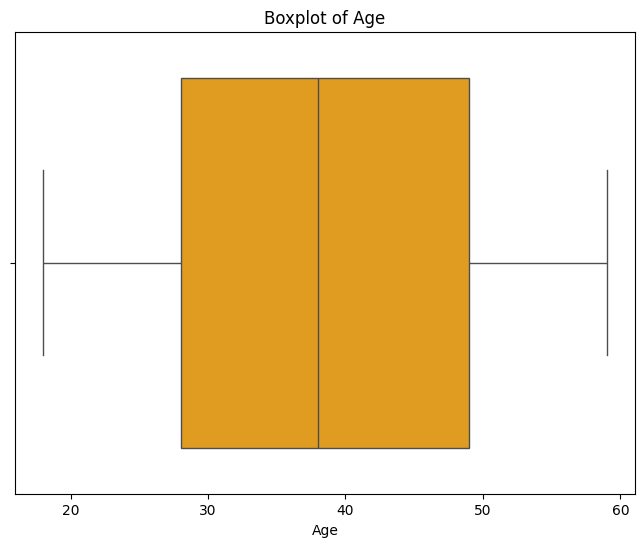

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Age"], color='orange')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

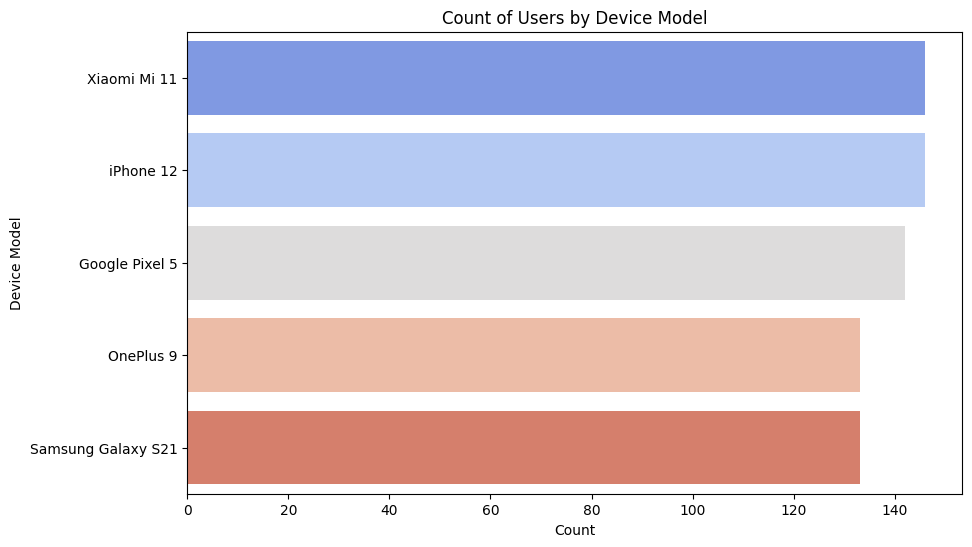

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Device Model', data=df, order=df['Device Model'].value_counts().index,
              palette='coolwarm')
plt.title('Count of Users by Device Model')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()

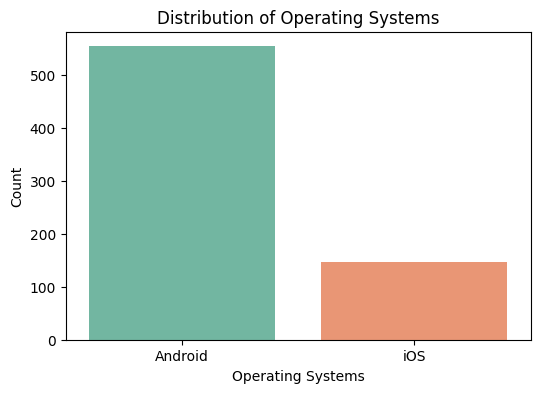

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Operating System', data=df, palette='Set2')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating Systems')
plt.ylabel('Count')
plt.show()

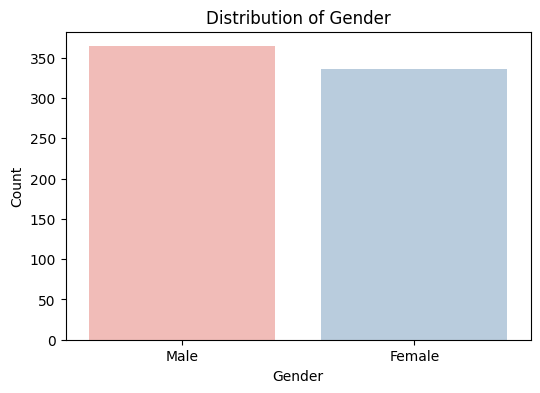

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Pastel1')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Bivariate Analysis

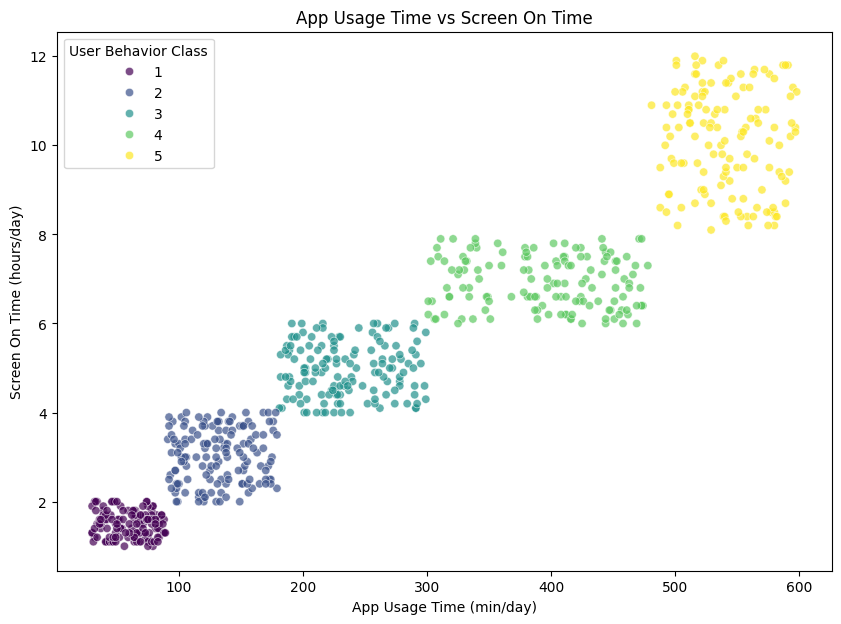

In [ ]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='App Usage Time (min/day)',
                y='Screen On Time (hours/day)',
                hue='User Behavior Class',
                palette='viridis',
                alpha=0.7)
plt.title('App Usage Time vs Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='User Behavior Class')
plt.show()

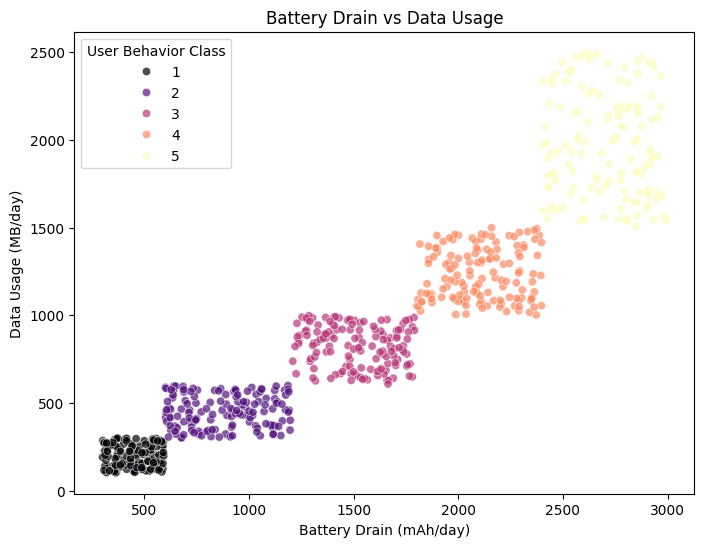

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Battery Drain (mAh/day)',
                y='Data Usage (MB/day)', hue='User Behavior Class', palette='magma', alpha=0.7)
plt.title('Battery Drain vs Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

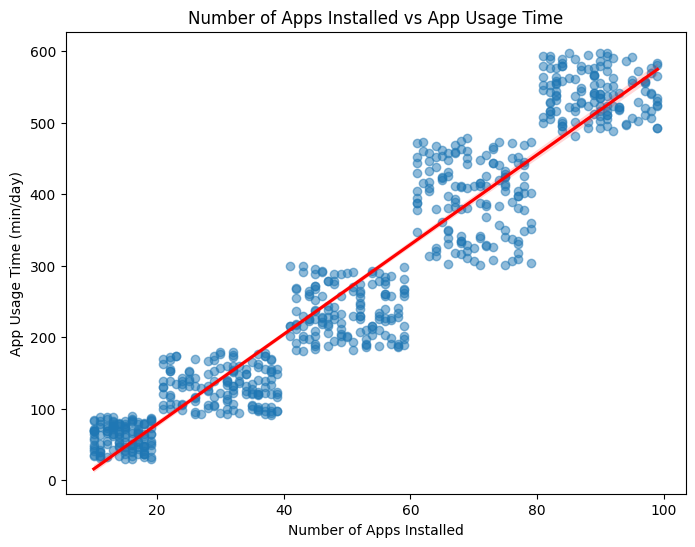

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Number of Apps Installed', y='App Usage Time (min/day)', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Number of Apps Installed vs App Usage Time')
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time (min/day)')
plt.show()

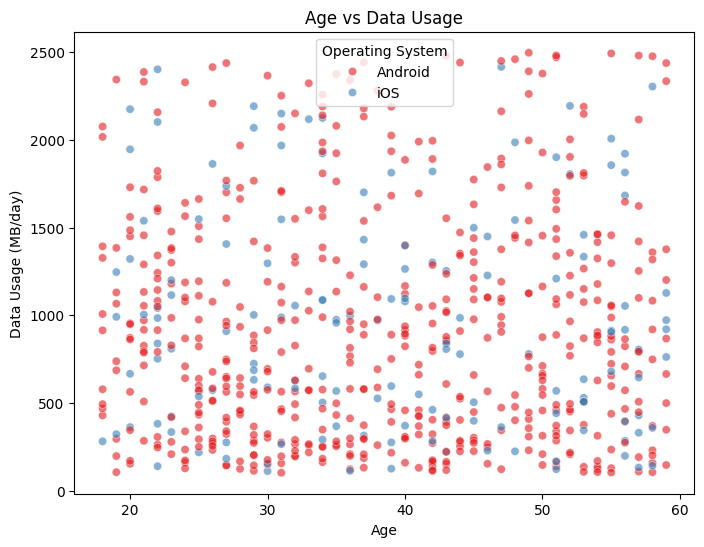

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Data Usage (MB/day)', hue='Operating System', palette='Set1',
                alpha=0.6)
plt.title('Age vs Data Usage')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.show()

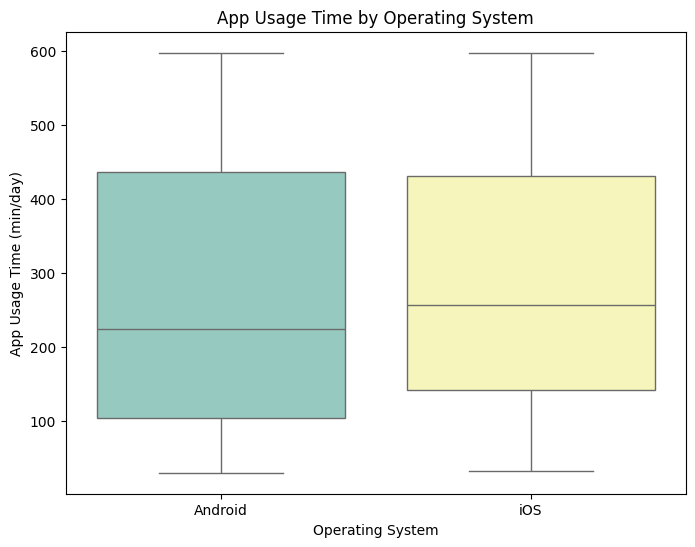

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='Set3')
plt.title('App Usage Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.show()

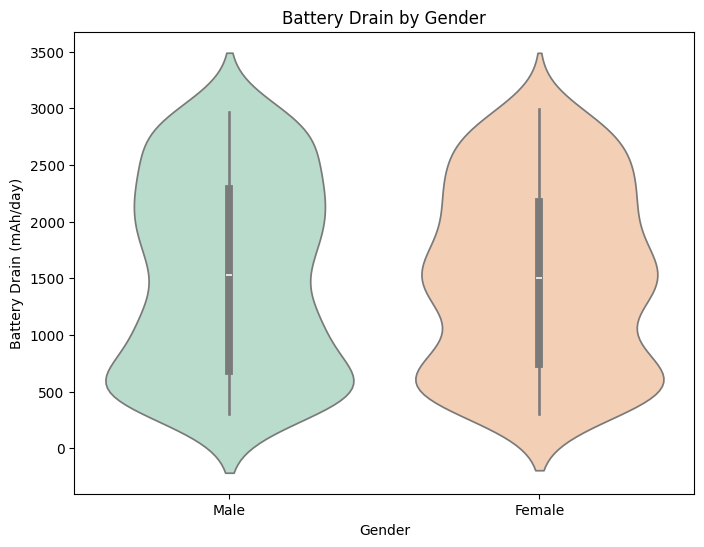

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Battery Drain (mAh/day)', data=df, palette='Pastel2')
plt.title('Battery Drain by Gender')
plt.xlabel('Gender')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

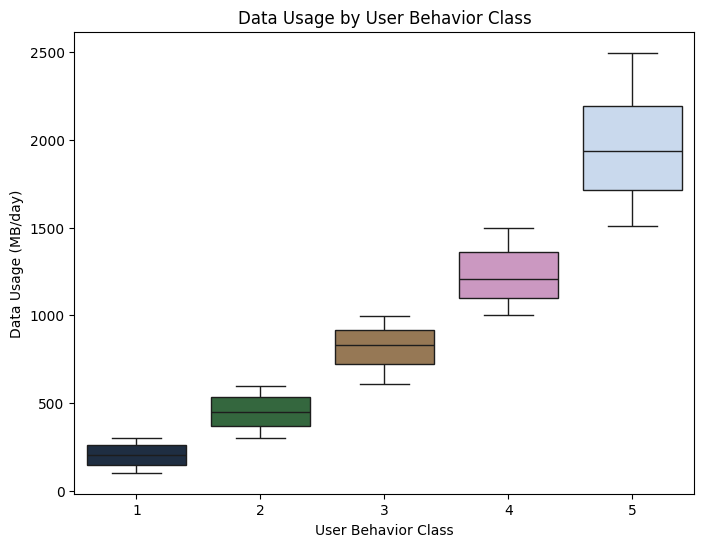

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, palette='cubehelix')
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.show()

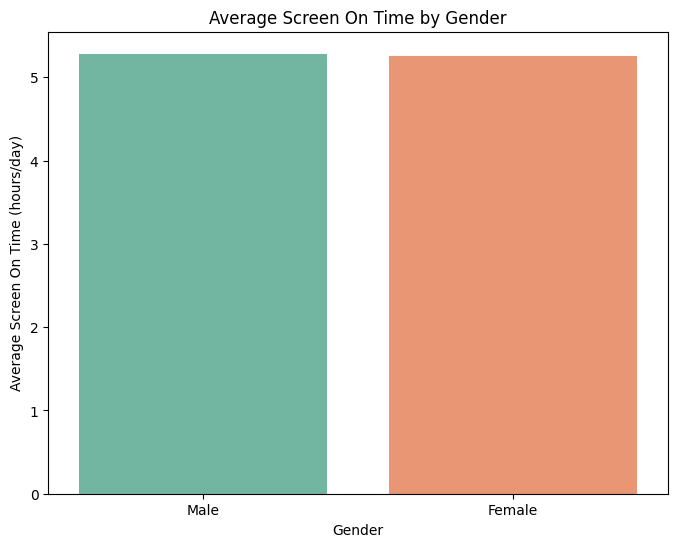

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df, palette='Set2', ci=None)
plt.title('Average Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Screen On Time (hours/day)')
plt.show()

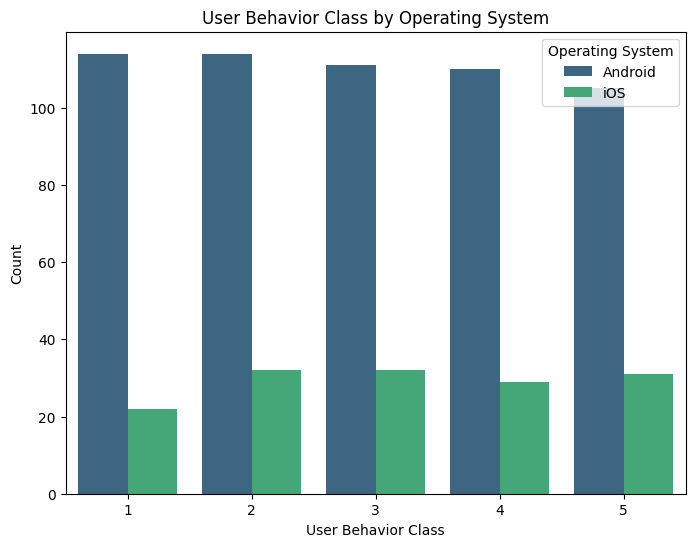

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Operating System', data=df, palette='viridis')
plt.title('User Behavior Class by Operating System')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()

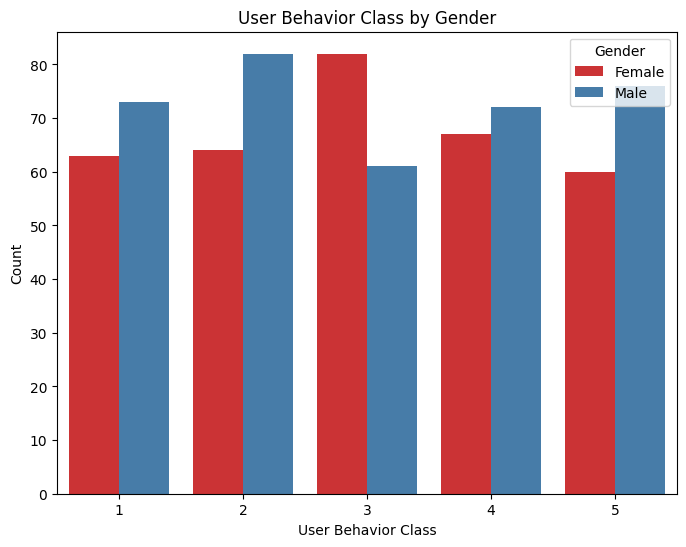

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Gender', data=df, palette='Set1')
plt.title('User Behavior Class by Gender')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Multivariate Analysis

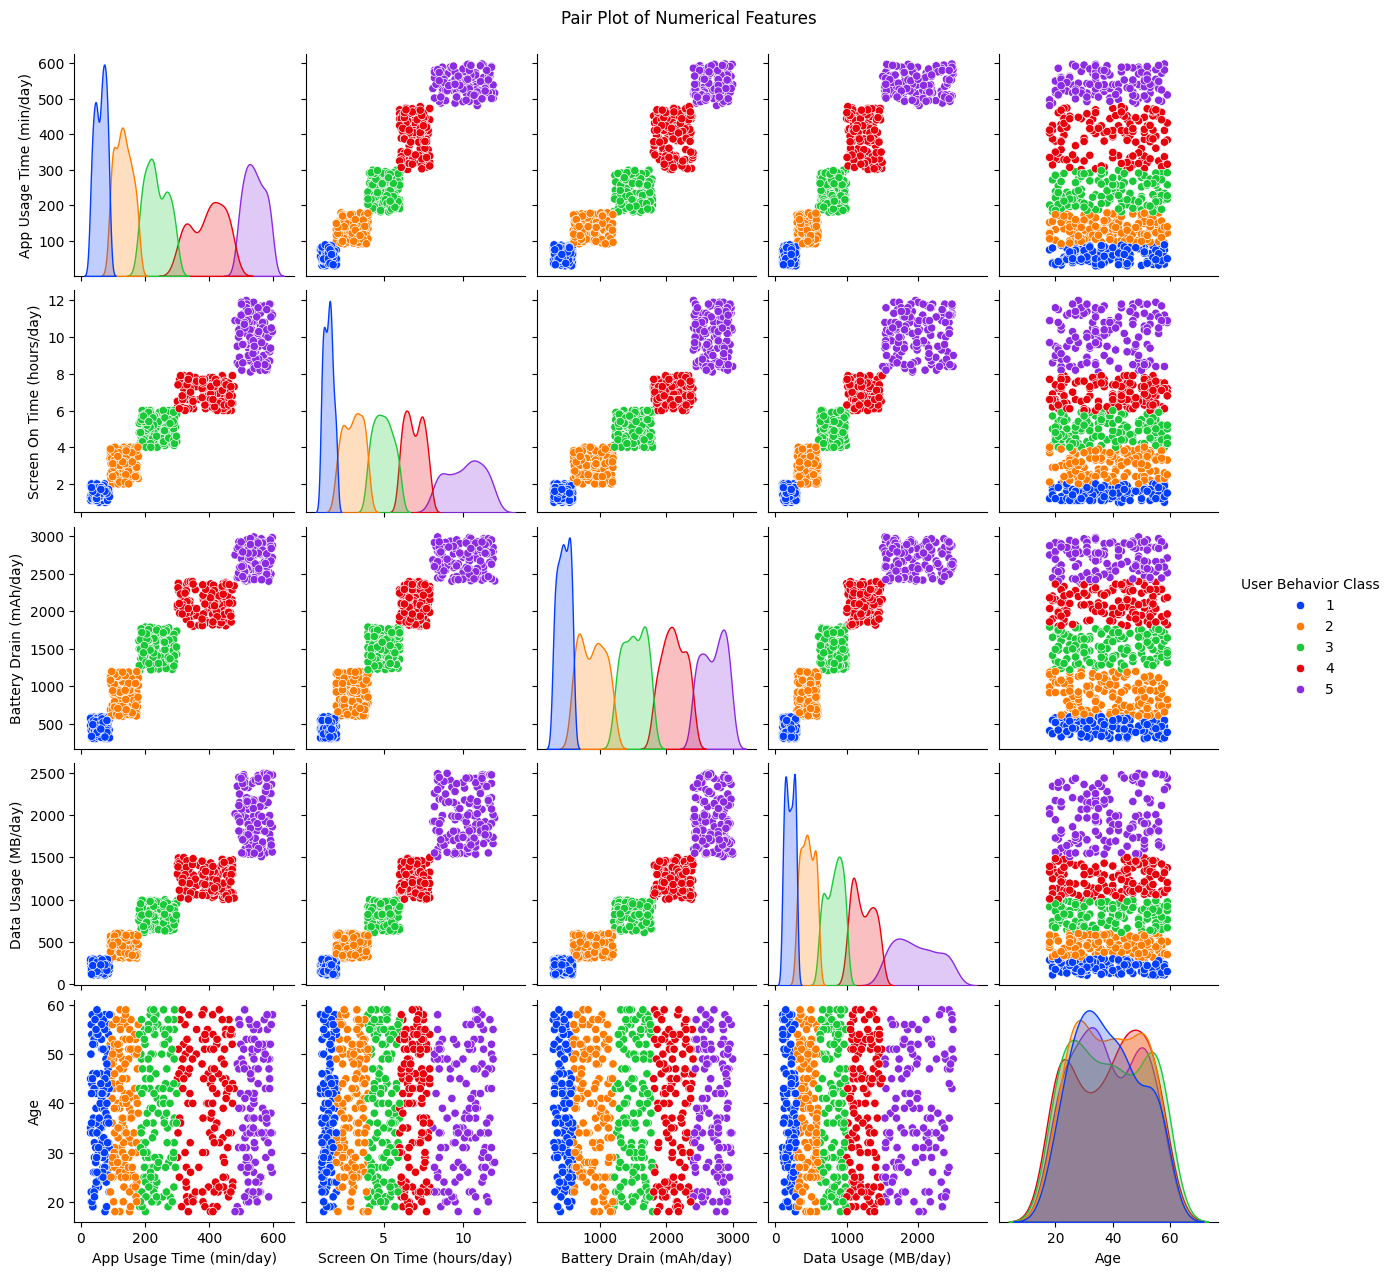

In [ ]:
sns.pairplot(df, vars=['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age'],
             hue='User Behavior Class', palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

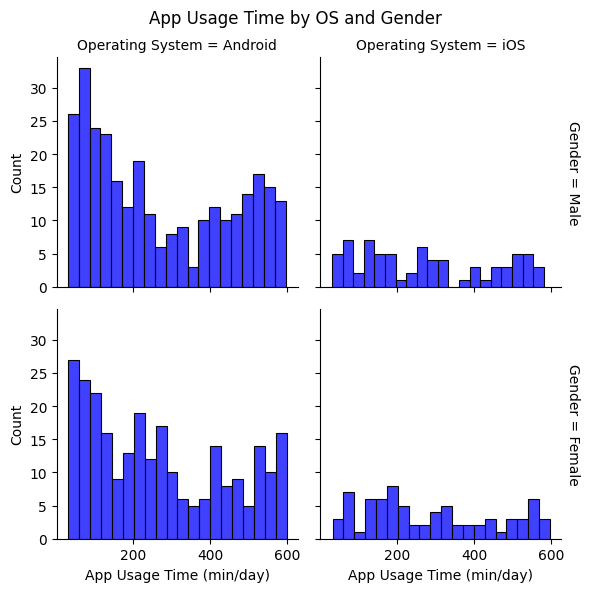

In [6]:
g = sns.FacetGrid(df, col='Operating System', row="Gender", margin_titles=True, palette='Set2')
g.map(sns.histplot, 'App Usage Time (min/day)', bins=20, kde=False, color='blue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('App Usage Time by OS and Gender')
plt.show()

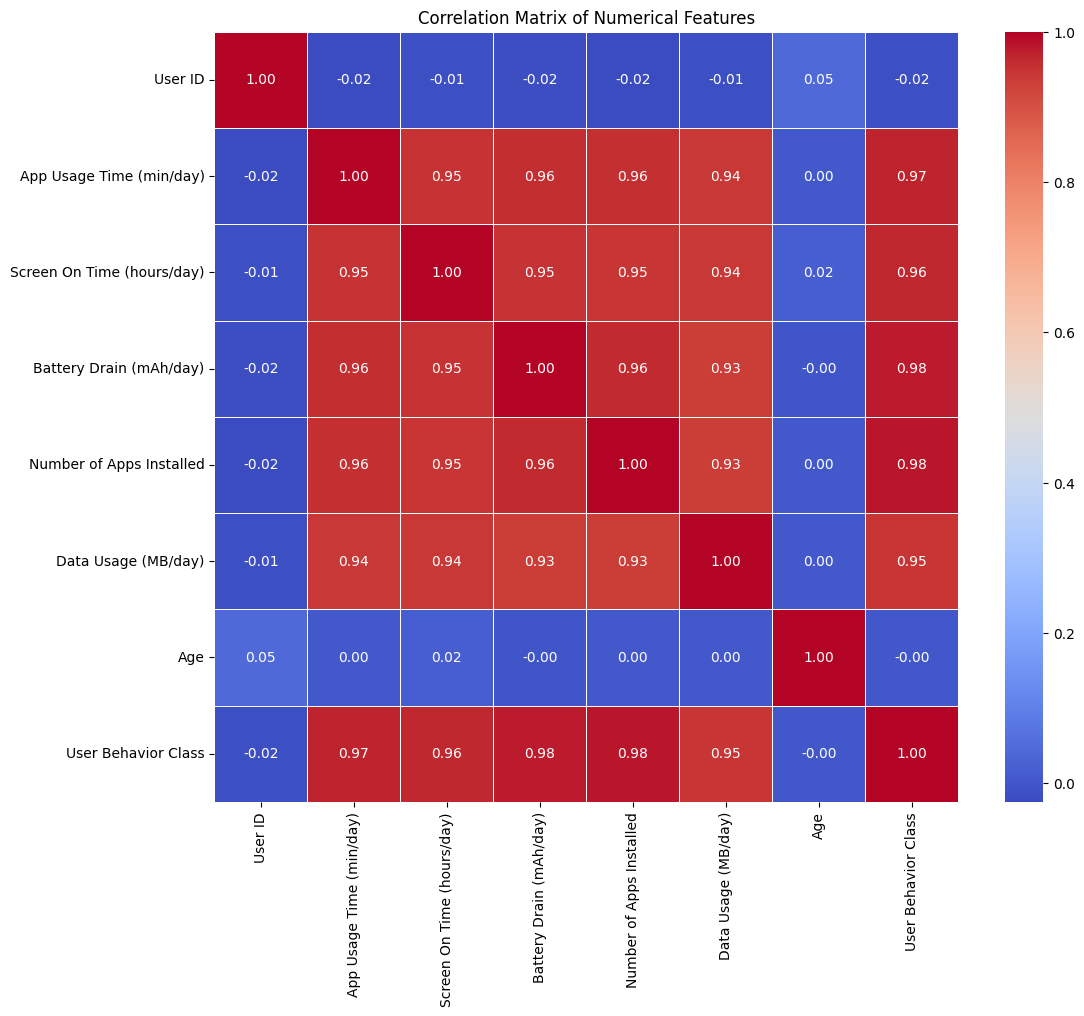

In [7]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

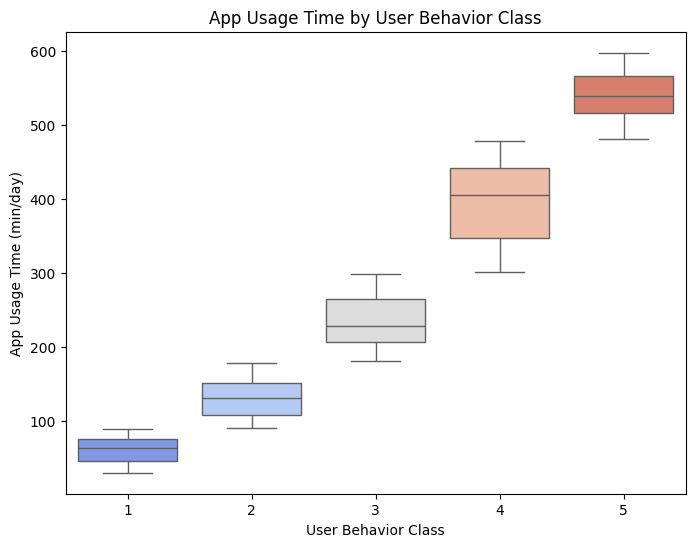

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df, palette='coolwarm')
plt.title('App Usage Time by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('App Usage Time (min/day)')
plt.show()

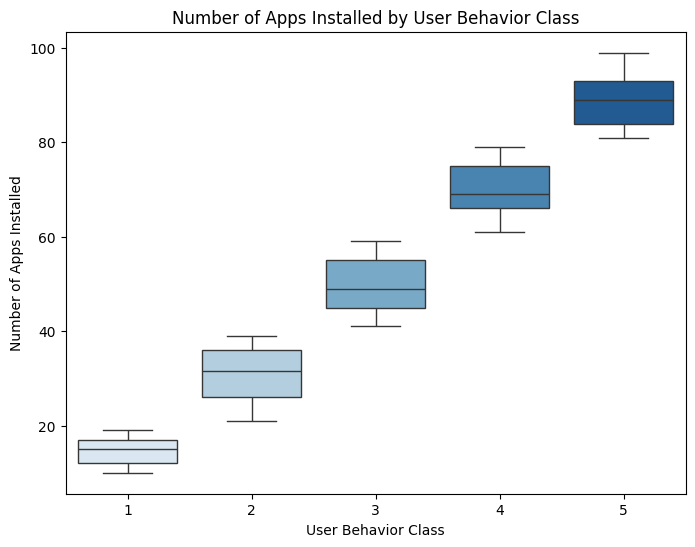

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Number of Apps Installed', data=df, palette='Blues')
plt.title('Number of Apps Installed by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Number of Apps Installed')
plt.show()

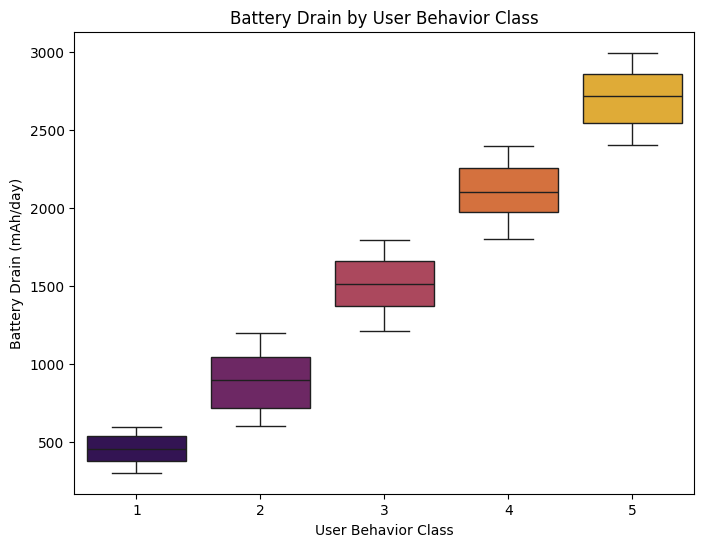

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Battery Drain (mAh/day)', data=df, palette='inferno')
plt.title('Battery Drain by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

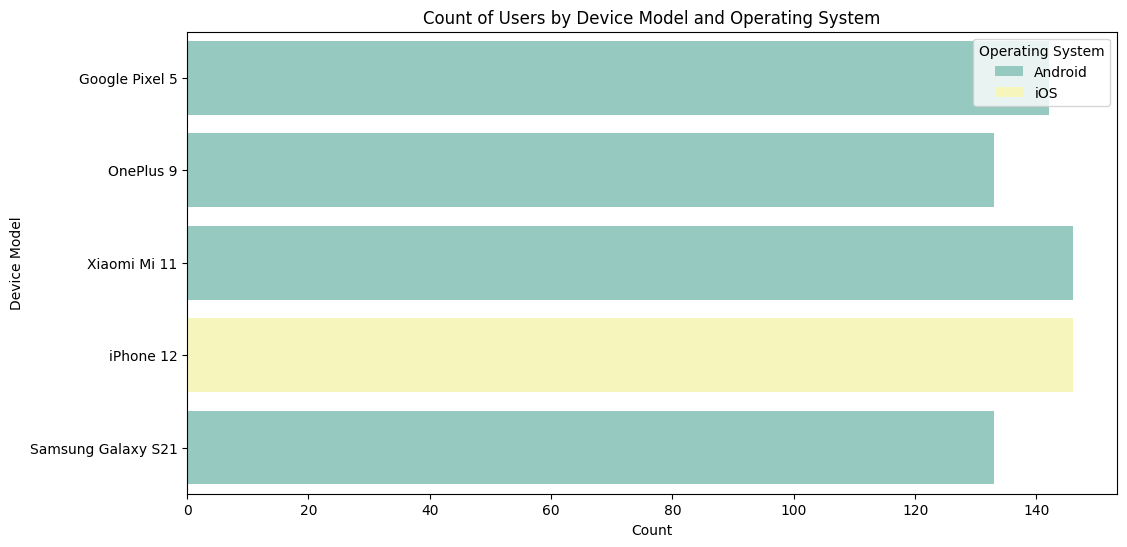

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Device Model', hue='Operating System', data=df, palette='Set3')
plt.title('Count of Users by Device Model and Operating System')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.legend(title='Operating System')
plt.show()

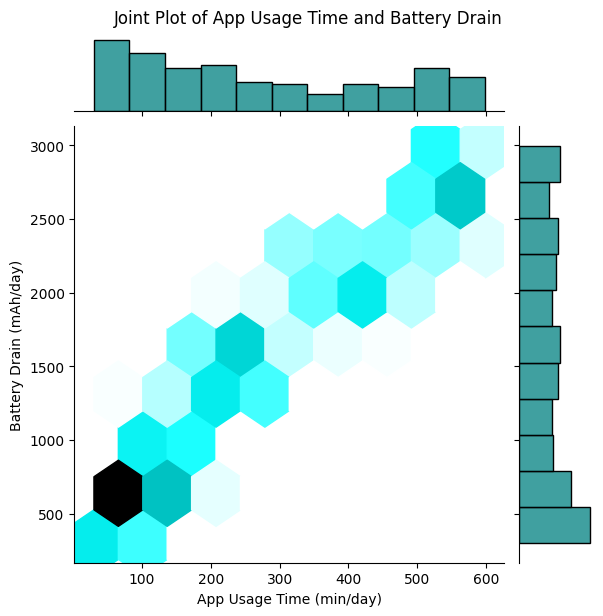

In [12]:
sns.jointplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df, kind='hex', color='teal')
plt.suptitle('Joint Plot of App Usage Time and Battery Drain', y=1.02)
plt.show()

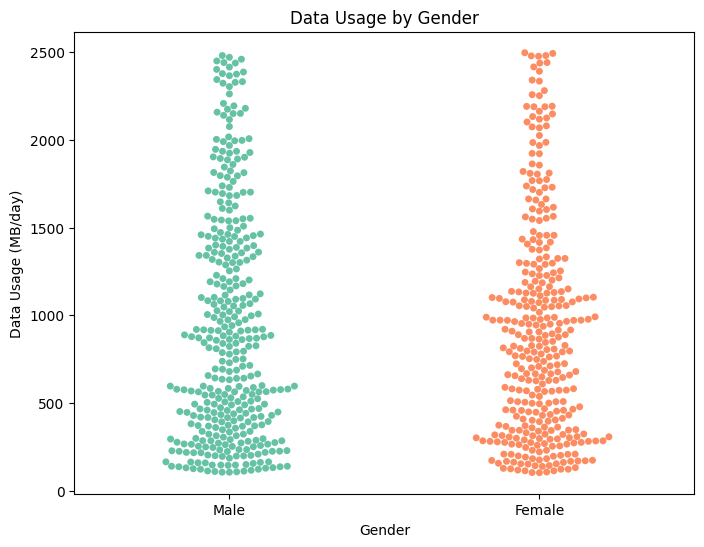

In [13]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Gender', y='Data Usage (MB/day)', data=df, palette='Set2')
plt.title('Data Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Data Usage (MB/day)')
plt.show()

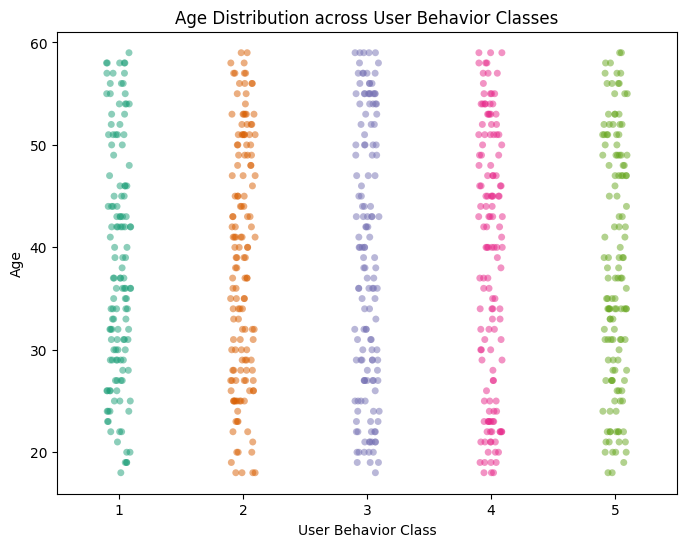

In [14]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='User Behavior Class', y='Age', data=df, jitter=True, alpha=0.5, palette='Dark2')
plt.title('Age Distribution across User Behavior Classes')
plt.xlabel('User Behavior Class')
plt.ylabel('Age')
plt.show()

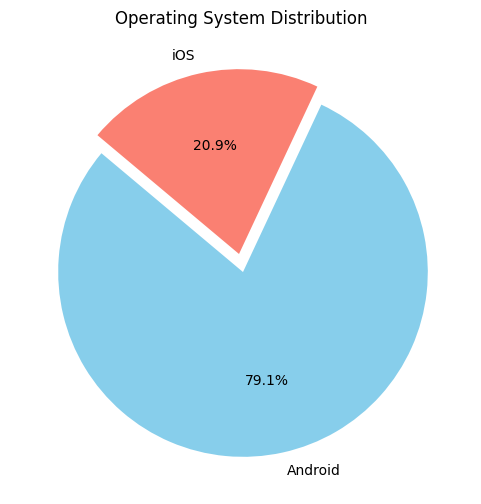

In [15]:
plt.figure(figsize=(6, 6))
df['Operating System'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, explode=[0.05, 0.05])
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()

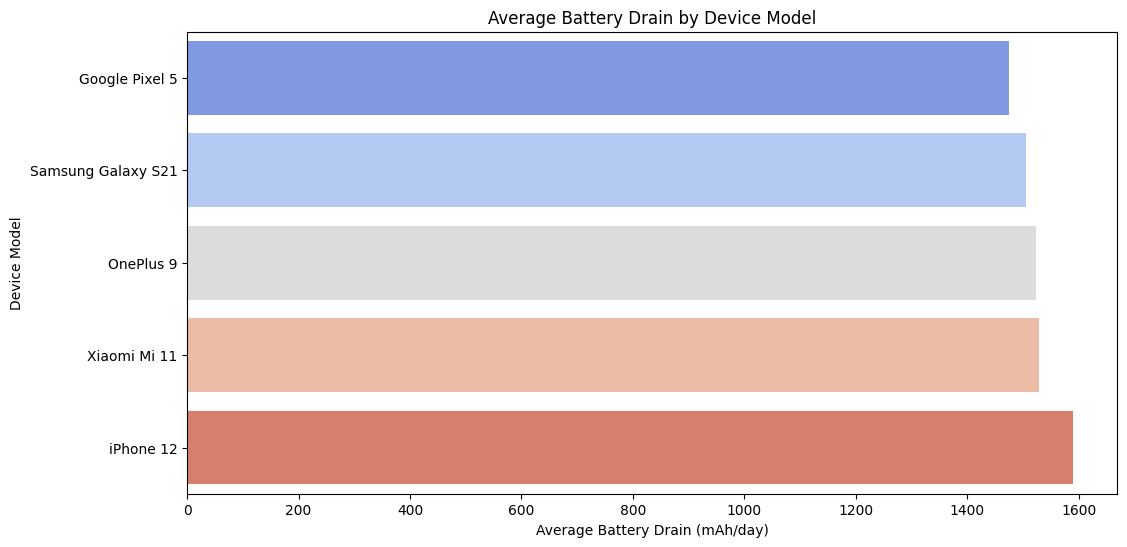

In [16]:
plt.figure(figsize=(12, 6))
avg_battery = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().sort_values()
sns.barplot(x=avg_battery.values, y=avg_battery.index, palette='coolwarm')
plt.title('Average Battery Drain by Device Model')
plt.xlabel('Average Battery Drain (mAh/day)')
plt.ylabel('Device Model')
plt.show()

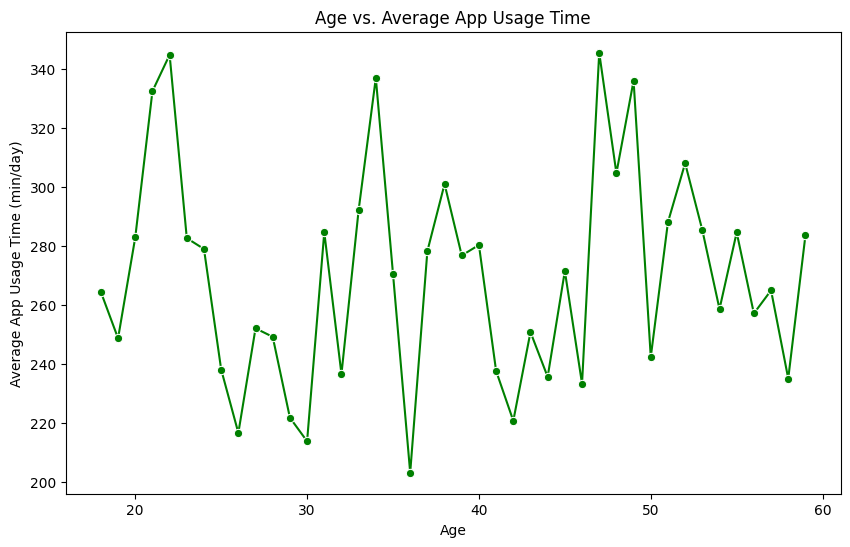

In [17]:
plt.figure(figsize=(10, 6))
age_usage = df.groupby('Age')['App Usage Time (min/day)'].mean().reset_index()
sns.lineplot(x='Age', y='App Usage Time (min/day)', data=age_usage, marker='o', color='green')
plt.title('Age vs. Average App Usage Time')
plt.xlabel('Age')
plt.ylabel('Average App Usage Time (min/day)')
plt.show()

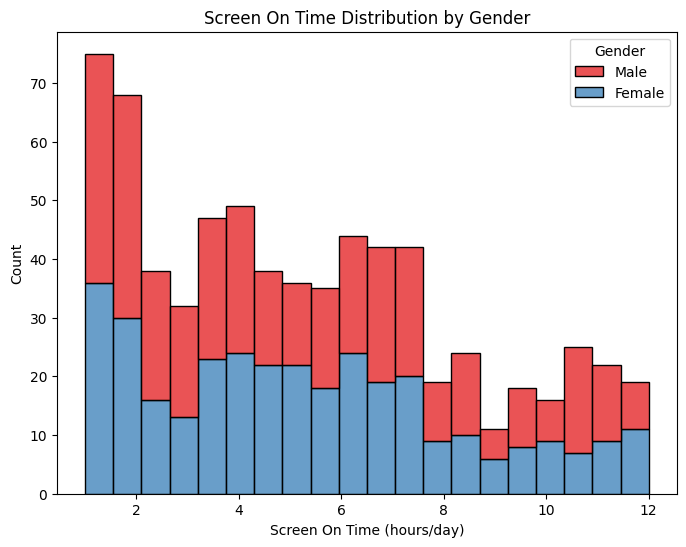

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Screen On Time (hours/day)', hue='Gender', multiple='stack', palette='Set1', bins=20)
plt.title('Screen On Time Distribution by Gender')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Count')
plt.show()

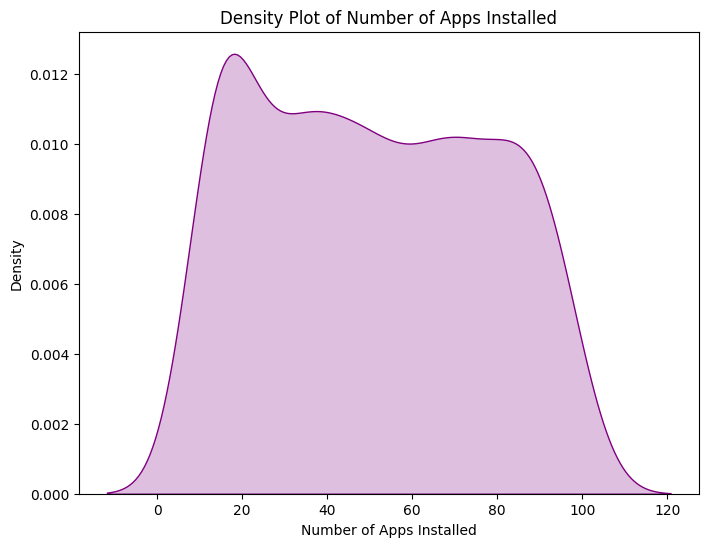

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Number of Apps Installed', shade=True, color='purple')
plt.title('Density Plot of Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Density')
plt.show()

Model For Classification of User Behavior

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
X = df.drop(['User ID', 'User Behavior Class'], axis=1)
y = df['User Behavior Class']

In [24]:
categorical_cools = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

In [25]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cools)
])

In [26]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [29]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 41]]


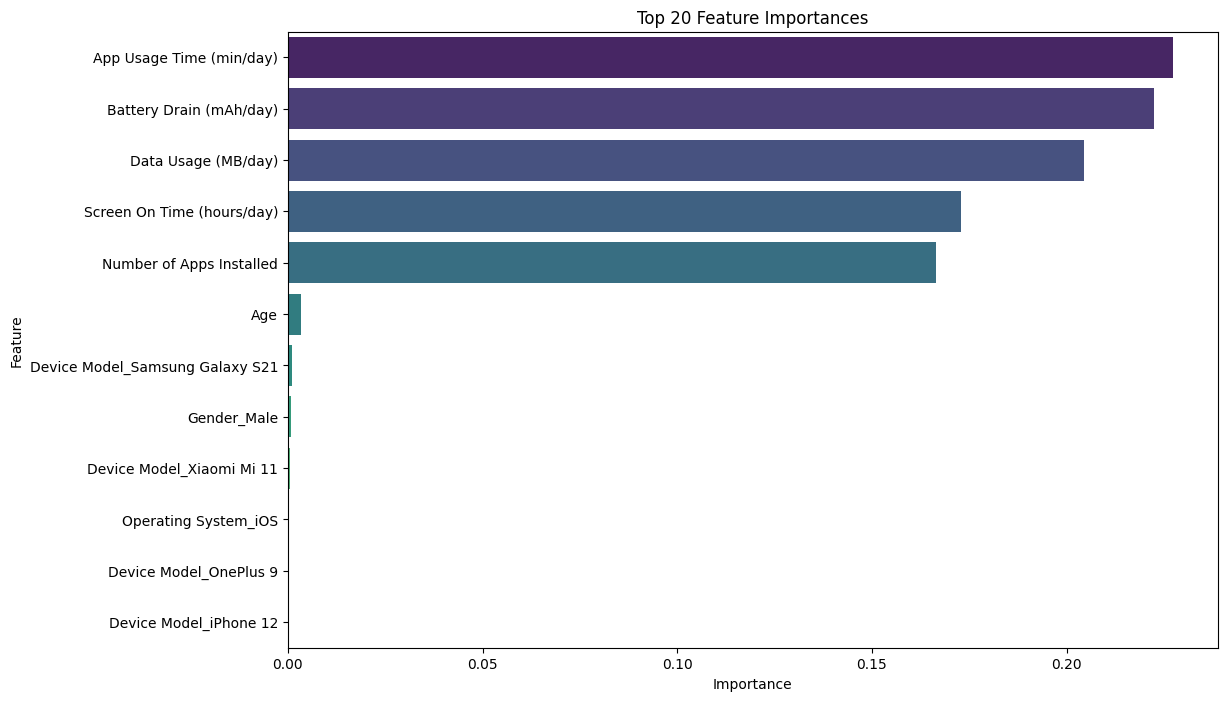

In [33]:
if hasattr(model.named_steps['classifier'], 'feature_importances_'):

    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cools))

    importances = model.named_steps['classifier'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances')
    plt.show()

Prediction of Battery Drain

In [34]:
X = df.drop(['User ID', 'Battery Drain (mAh/day)'], axis=1)
y = df['Battery Drain (mAh/day)']

categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 148.95990476190477


In [37]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE): 31249.32521238095


In [38]:
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error (RMSE): 176.7747866987285


In [39]:
print("R-squared (R²):", r2_score(y_test, y_pred))

R-squared (R²): 0.9516723527485257


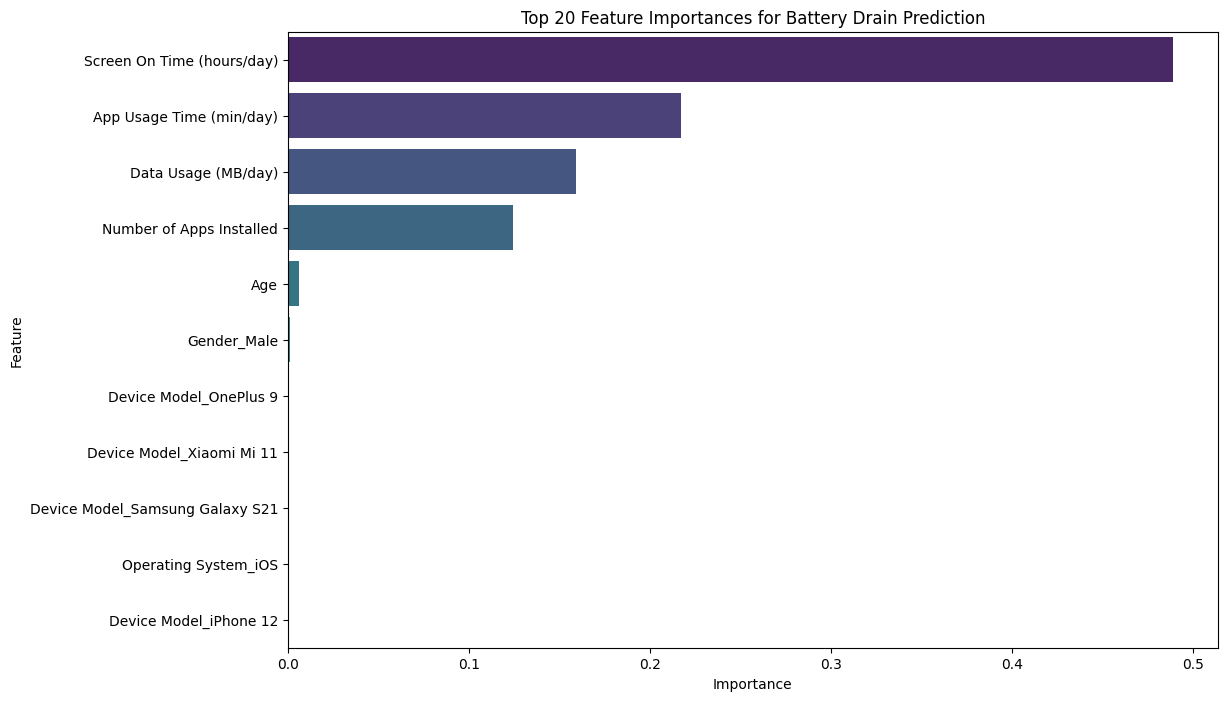

In [40]:
if hasattr(model.named_steps['regressor'], 'feature_importances_'):

    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))

    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances for Battery Drain Prediction')
    plt.show()